In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

class TestBed:
    def __init__(self, k=10, runs=2000, increment_fnc=partial(np.random.normal, 0, 0.01), stationary=True):
        self.k = k
        self.runs = runs
        self.increment_fnc = increment_fnc
        self.stationary = stationary
        if self.stationary:
            self.learner = StationaryLearner
        else:
            self.learner = NonStationaryLearner

    def create_bandits(self,):
        q_star = np.full(self.k, 0.0)
        return q_star

    def get_reward(self, q_star, action):
        return np.random.normal(q_star[action], 1)

    def single_run(self, learning_algorithm, k=10, time_steps=1000): 
        q_star = self.create_bandits()
        optimal_action = np.argmax(q_star)

        rewards = []
        optimal_selections = []
        for i in range(time_steps):
            if i > 0:
                q_star += self.increment_fnc(k) # extra experiment
            
            action = learning_algorithm.select_action()
            reward = self.get_reward(q_star, action)
            rewards.append(reward)

            is_optimal = action == optimal_action
            optimal_selections.append(is_optimal)

            learning_algorithm.update(action, reward)
        return rewards, optimal_selections

    def evaluate_testbed(self):
        all_run_rewards = []
        all_run_optimal = []
        
        for run in range(self.runs):
            algorithm = self.learner()
            run_rewards, run_optimal = self.single_run(algorithm)
            all_run_rewards.append(run_rewards)
            all_run_optimal.append(run_optimal)
        
        self.average_rewards = np.mean(all_run_rewards, axis=0)
        self.percent_optimal = np.mean(all_run_optimal, axis=0) * 100

    def plot_rewards(self):
        label = "Stationary" if self.stationary else "Non-stationary"
        plt.plot(range(len(self.average_rewards)), self.average_rewards, label=label)
        plt.title("Average rewards vs. Steps")
        plt.xlabel("Steps")
        plt.ylabel("Average rewards")
        plt.legend()

    def plot_optimal(self):
        label = "Stationary" if self.stationary else "Non-stationary"
        plt.plot(range(len(self.percent_optimal)), self.percent_optimal, label=label)
        plt.title("Percent optimal vs. Steps")
        plt.xlabel("Steps")
        plt.ylabel("Percent optimal")
        plt.legend()

class StationaryLearner:
    def __init__(self, k=10, eps=0.1):
        self.k = k
        self.eps = eps
        self.q_array = np.zeros(self.k)
        self.arm_counts = {}
    
    def select_action(self):
        # non-greedy case
        if np.random.uniform(0,1) < self.eps:
            arm = np.random.randint(0, self.k)
        # greedy case
        else:
            arm = np.argmax(self.q_array)
        
        if arm in self.arm_counts:
            self.arm_counts[arm] += 1
        else:
            self.arm_counts[arm] = 1
        
        return arm

    def update(self, action, r):
        n = self.arm_counts[action]
        q = self.q_array[action]
        q = q + ((r-q)/n)
        self.q_array[action] = q
        return q
    
class NonStationaryLearner:
    def __init__(self, k=10, eps=0.1, alpha=0.1):
        self.k = k
        self.eps = eps
        self.q_array = np.zeros(self.k)
        self.alpha = alpha
    
    def select_action(self):
        # non-greedy case
        if np.random.uniform(0,1) < self.eps:
            arm = np.random.randint(0, self.k)
        # greedy case
        else:
            arm = np.argmax(self.q_array)
        return arm  
    
    def update(self, action, r):
        q = self.q_array[action]
        q = q + (self.alpha*(r - q))
        self.q_array[action] = q
        return q

In [2]:
stat_testbed_normal = TestBed(runs=10000, stationary=True)
non_stat_testbed_normal = TestBed(runs=10000, stationary=False)
stat_testbed_lognormal = TestBed(runs=10000, increment_fnc=partial(np.random.lognormal, 0, 0.01), stationary=True)
non_stat_testbed_lognormal = TestBed(runs=10000, increment_fnc=partial(np.random.lognormal, 0, 0.01), stationary=False)
stat_testbed_exp = TestBed(runs=10000, increment_fnc=partial(np.random.exponential, 0.01), stationary=True)
non_stat_testbed_exp = TestBed(runs=10000, increment_fnc=partial(np.random.exponential, 0.01), stationary=False)

stat_testbed_normal.evaluate_testbed()
non_stat_testbed_normal.evaluate_testbed()
stat_testbed_lognormal.evaluate_testbed()
non_stat_testbed_lognormal.evaluate_testbed()
stat_testbed_exp.evaluate_testbed()
non_stat_testbed_exp.evaluate_testbed()

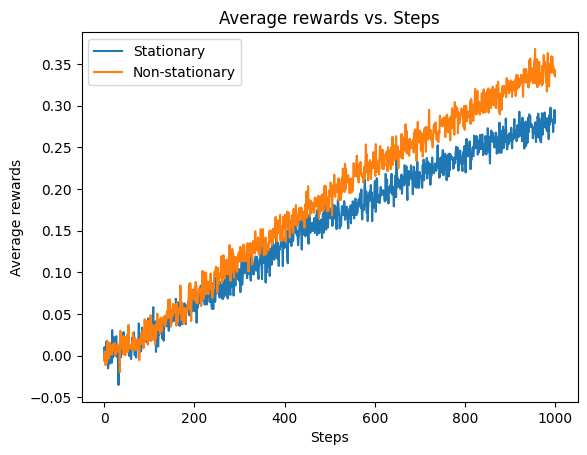

In [3]:
stat_testbed_normal.plot_rewards()
non_stat_testbed_normal.plot_rewards()

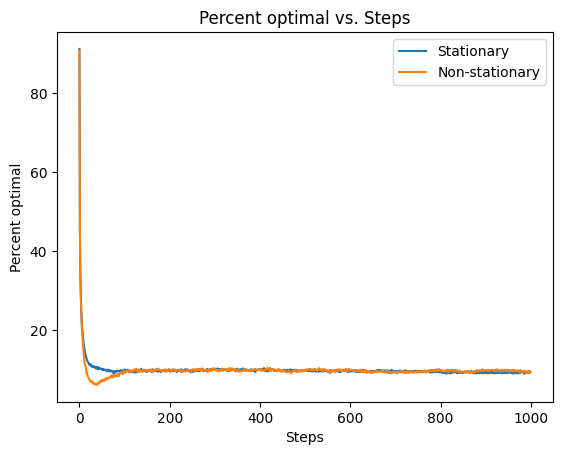

In [4]:
stat_testbed_normal.plot_optimal()
non_stat_testbed_normal.plot_optimal()

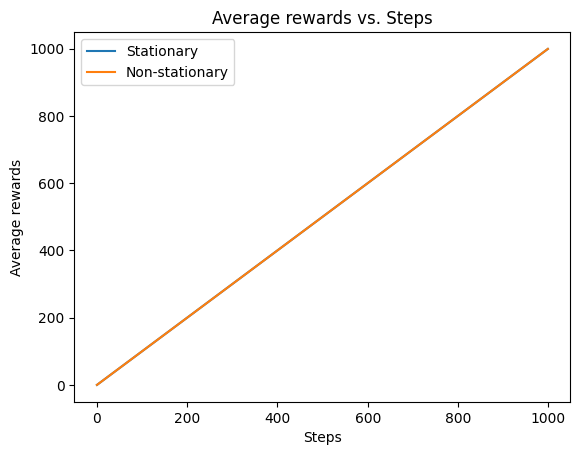

In [5]:
stat_testbed_lognormal.plot_rewards()
non_stat_testbed_lognormal.plot_rewards()

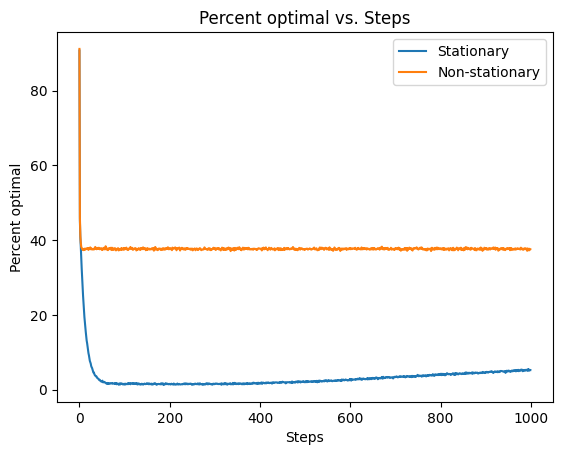

In [6]:
stat_testbed_lognormal.plot_optimal()
non_stat_testbed_lognormal.plot_optimal()

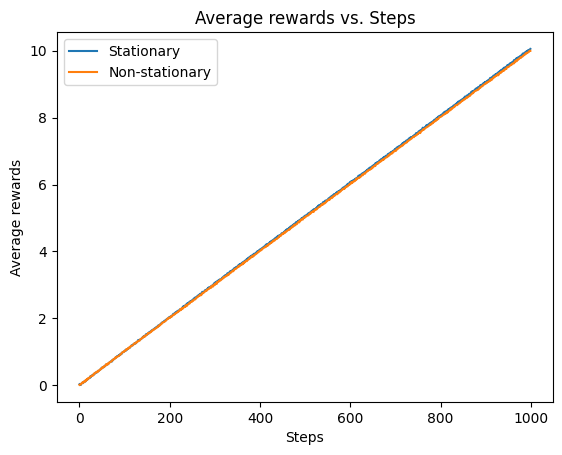

In [7]:
stat_testbed_exp.plot_rewards()
non_stat_testbed_exp.plot_rewards()

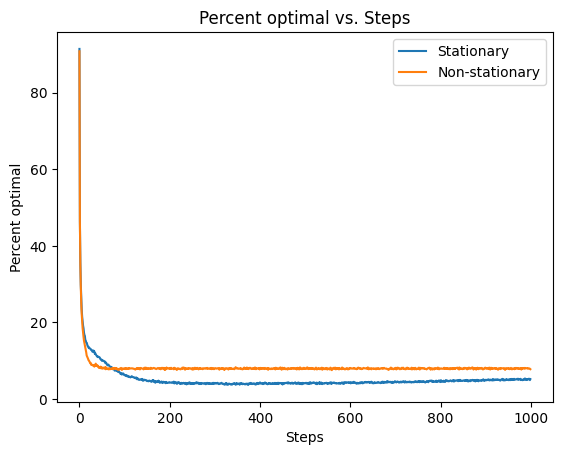

In [8]:
stat_testbed_exp.plot_optimal()
non_stat_testbed_exp.plot_optimal()

In [5]:
import numpy as np
from functools import partial

partial(np.random.normal, 0, 0.01).func.__name__

'normal'